Example using `epistemic_quantile_regressor.py`

In [1]:
from epistemic_quantile_regressor import EpistemicQuantileRegressor

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
# plt.style.use(['default'])
# plt.style.use(['science', 'notebook', 'bright'])
plt.style.use(['science', 'notebook', 'muted'])

# plt.style.use(['science', 'notebook', 'grid'])

plt.rcParams['text.usetex'] = False

In [3]:

from sklearn.model_selection import train_test_split


def f(x):
    """The function to predict."""
    return x * np.sin(x)


rng = np.random.RandomState(42)
X = np.atleast_2d(rng.uniform(0, 10.0, size=1000)).T
expected_y = f(X).ravel()


heteroscedastic noise

In [4]:
# sigma = 0.5 + X.ravel() / 10
sigma = 0.5 + X.ravel() / 30
noise = rng.lognormal(sigma=sigma) - np.exp(sigma**2 / 2)
y = expected_y + noise

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [6]:
mask = (X_train[:,0] > 4) & (X_train[:,0] < 6)
X_train = X_train[~mask]
y_train = y_train[~mask]

mask = (X_test[:,0] > 4) & (X_test[:,0] < 6)
X_test = X_test[~mask]
y_test = y_test[~mask]

In [7]:
mask = (X_train[:,0] > 7) & (X_train[:,0] < 9)
X_train = X_train[~mask]
y_train = y_train[~mask]

mask = (X_test[:,0] > 7) & (X_test[:,0] < 9)
X_test = X_test[~mask]
y_test = y_test[~mask]

In [8]:
# X_train = np.r_[X_train, np.random.uniform(-3, -2, (100, 1))]
# y_train = np.concatenate((y_train, np.random.uniform(0, 2, 100)))

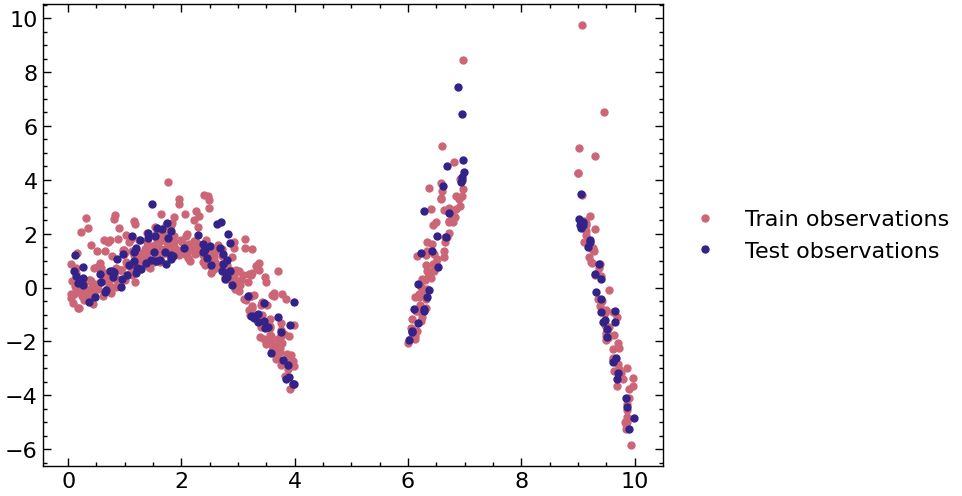

In [9]:
plt.plot(X_train, y_train, "C0.", markersize=10, label="Train observations")
plt.plot(X_test, y_test, "C1.", markersize=10, label="Test observations")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [10]:
eqr_model = EpistemicQuantileRegressor([(-5, 15)]).fit(X_train, y_train)

In [11]:
# eqr_model.models[0.05].best_params_

In [12]:
# eqr_model.models[0.5].best_params_

In [13]:
# eqr_model.models[0.95].best_params_

In [14]:
eqr_model.models

{0.05: HalvingRandomSearchCV(estimator=GradientBoostingRegressor(alpha=0.05,
                                                           loss='quantile',
                                                           random_state=0),
                       max_resources=600, min_resources=50, n_jobs=2,
                       param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                            'min_samples_leaf': [1, 5, 10, 20],
                                            'min_samples_split': [5, 10, 20, 30,
                                                                  50]},
                       random_state=0, resource='n_estimators',
                       scoring=make_scorer(mean_pinball_loss, greater_is_better=False, alpha=0.05)),
 0.5: HalvingRandomSearchCV(estimator=GradientBoostingRegressor(alpha=0.5,
                                                           loss='quantile',
                                                           random_state=0

In [15]:
# xx = np.atleast_2d(np.linspace(-25, 35, 1000)).T
xx = np.atleast_2d(np.linspace(-5, 15, 1000)).T
# xx = np.atleast_2d(np.linspace(0, 10, 1000)).T

In [16]:
# %%timeit
# np.atleast_2d(eqr_model.models[0.5](xx))[:,0]

In [17]:
%%timeit
np.atleast_2d(eqr_model.models[0.5].predict(xx))[:,0]

1.27 ms ± 2.71 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


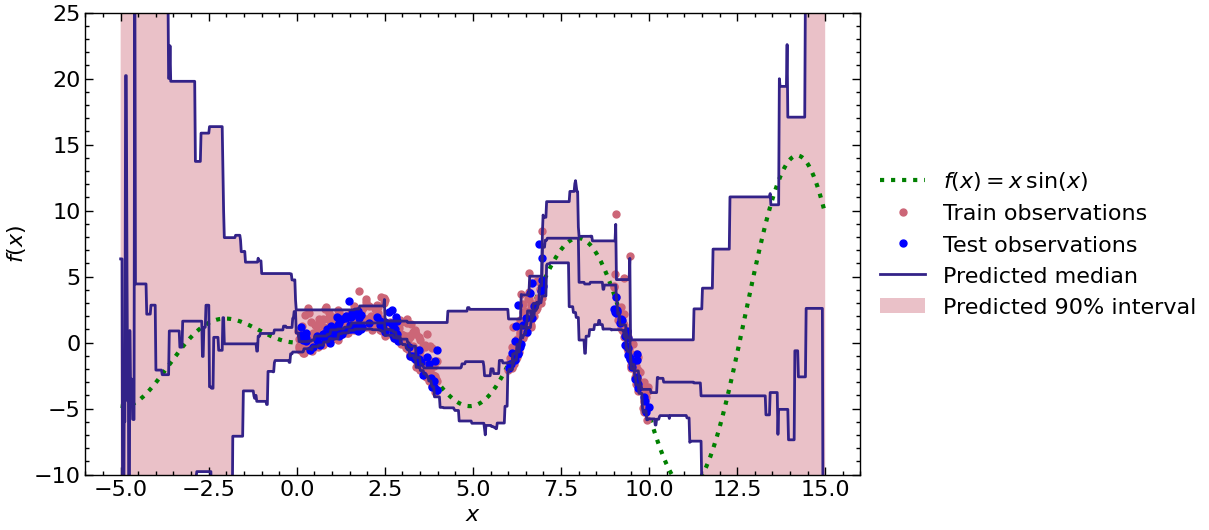

In [22]:
y_lower = np.atleast_2d(eqr_model.models[0.05].predict(xx)).reshape(-1, 1)[:,0]
y_upper = np.atleast_2d(eqr_model.models[0.95].predict(xx)).reshape(-1, 1)[:,0]
y_med = np.atleast_2d(eqr_model.models[0.5].predict(xx)).reshape(-1, 1)[:,0]

fig = plt.figure(figsize=(10, 6), dpi=100)
plt.plot(xx, f(xx), "g:", linewidth=3, label=r"$f(x) = x\,\sin(x)$")
plt.plot(X_train, y_train, "C0.", markersize=10, label="Train observations")
plt.plot(X_test, y_test, "b.", markersize=10, label="Test observations")
# plt.plot(xx, y_pred, "C0--", label="Predicted mean")
plt.plot(xx, y_med, "C1-", label="Predicted median")
plt.plot(xx, y_upper, "C1-")
plt.plot(xx, y_lower, "C1-")
plt.fill_between(
    xx.ravel(), y_lower, y_upper, alpha=0.4, label="Predicted 90% interval"
)

# plt.plot(X_synth_out_domain, y_synth_ood, "C4.", label='OOD synthetic data')

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.ylim(-10, 25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()